In [ ]:
# Importar as bibliotecas para tratamento dos dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_rows', 90)

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler, MaxAbsScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Importar base de treino E teste
from google.colab import drive
drive.mount('/content/drive')

X_full = pd.read_csv('/content/drive/My Drive/TCC/train.csv',  index_col='Id') # esta base de dados contem todas as colunas e servirá para o treino

X_test = pd.read_csv('/content/drive/My Drive/TCC/test.csv',  index_col='Id') 
X_full.head(0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

In [ ]:
X_full['Alley'] = X_full['Alley'].fillna('NA') # os valores ausentes da coluna Alley representam que a propriedade não possui beco
X_full['BsmtQual'] = X_full['BsmtQual'].fillna('NA') # os valores ausentes significam sem porão
X_full['BsmtCond'] = X_full['BsmtCond'].fillna('NA') # os valores ausentes significam sem porão
X_full['BsmtExposure'] = X_full['BsmtExposure'].fillna('NA')
X_full['BsmtFinType1'] = X_full['BsmtFinType1'].fillna('NA')
X_full['BsmtFinType2'] = X_full['BsmtFinType2'].fillna('NA')
X_full['FireplaceQu'] = X_full['FireplaceQu'].fillna('NA')
X_full['GarageType'] = X_full['GarageType'].fillna('NA')
X_full['GarageFinish'] = X_full['GarageFinish'].fillna('NA')
X_full['GarageQual'] = X_full['GarageQual'].fillna('NA')
X_full['GarageCond'] = X_full['GarageCond'].fillna('NA')
X_full['PoolQC'] = X_full['PoolQC'].fillna('NA')
X_full['Fence'] = X_full['Fence'].fillna('NA')
X_full['MiscFeature'] = X_full['MiscFeature'].fillna('NA')

In [ ]:
X_test['Alley'] = X_test['Alley'].fillna('NA') # os valores ausentes da coluna Alley representam que a propriedade não possui beco
X_test['BsmtQual'] = X_test['BsmtQual'].fillna('NA') # os valores ausentes significam sem porão
X_test['BsmtCond'] = X_test['BsmtCond'].fillna('NA') # os valores ausentes significam sem porão
X_test['BsmtExposure'] = X_test['BsmtExposure'].fillna('NA')
X_test['BsmtFinType1'] = X_test['BsmtFinType1'].fillna('NA')
X_test['BsmtFinType2'] = X_test['BsmtFinType2'].fillna('NA')
X_test['FireplaceQu'] = X_test['FireplaceQu'].fillna('NA')
X_test['GarageType'] = X_test['GarageType'].fillna('NA')
X_test['GarageFinish'] = X_test['GarageFinish'].fillna('NA')
X_test['GarageQual'] = X_test['GarageQual'].fillna('NA')
X_test['GarageCond'] = X_test['GarageCond'].fillna('NA')
X_test['PoolQC'] = X_test['PoolQC'].fillna('NA')
X_test['Fence'] = X_test['Fence'].fillna('NA')
X_test['MiscFeature'] = X_test['MiscFeature'].fillna('NA')

In [ ]:
# Existem duas colunas numéricas com nulos:  LotFrontage e GarageYrBlt
#tratar a coluna LotFrontage com a média
media = X_full['LotFrontage'].mean() 
X_full['LotFrontage'] = X_full['LotFrontage'].fillna(media)

mediat = X_test['LotFrontage'].mean() 
X_test['LotFrontage'] = X_test['LotFrontage'].fillna(mediat)

In [ ]:
X_full['MasVnrType']=X_full['MasVnrType'].fillna(X_full['MasVnrType'].mode()[0])
X_full['MasVnrArea']=X_full['MasVnrArea'].fillna(X_full['MasVnrArea'].mode()[0])
X_full['Electrical']=X_full['Electrical'].fillna(X_full['Electrical'].mode()[0])

In [ ]:
X_test['MasVnrType']=X_test['MasVnrType'].fillna(X_test['MasVnrType'].mode()[0])
X_test['MasVnrArea']=X_test['MasVnrArea'].fillna(X_test['MasVnrArea'].mode()[0])
X_test['MSZoning']=X_test['MSZoning'].fillna(X_test['MSZoning'].mode()[0])

X_test['Utilities']=X_test['Utilities'].fillna(X_test['Utilities'].mode()[0])
X_test['Exterior1st']=X_test['Exterior1st'].fillna(X_test['Exterior1st'].mode()[0])
X_test['Exterior2nd']=X_test['Exterior2nd'].fillna(X_test['Exterior2nd'].mode()[0])
X_test['BsmtFinSF1']=X_test['BsmtFinSF1'].fillna(X_test['BsmtFinSF1'].mode()[0])
X_test['BsmtFinSF2']=X_test['BsmtFinSF2'].fillna(X_test['BsmtFinSF2'].mode()[0])
X_test['TotalBsmtSF']=X_test['TotalBsmtSF'].fillna(X_test['TotalBsmtSF'].mode()[0])
X_test['BsmtFullBath']=X_test['BsmtFullBath'].fillna(X_test['BsmtFullBath'].mode()[0])
X_test['BsmtHalfBath']=X_test['BsmtHalfBath'].fillna(X_test['BsmtHalfBath'].mode()[0])
X_test['KitchenQual']=X_test['KitchenQual'].fillna(X_test['KitchenQual'].mode()[0])

X_test['Functional']=X_test['Functional'].fillna(X_test['Functional'].mode()[0])
X_test['GarageCars']=X_test['GarageCars'].fillna(X_test['GarageCars'].mode()[0])
X_test['GarageArea']=X_test['GarageArea'].fillna(X_test['GarageArea'].mode()[0])
X_test['SaleType']=X_test['SaleType'].fillna(X_test['SaleType'].mode()[0])
X_test['BsmtUnfSF']=X_test['BsmtUnfSF'].fillna(X_test['BsmtUnfSF'].mode()[0])

In [ ]:
X_full.drop(columns=['GarageYrBlt'], inplace=True)
X_test.drop(columns=['GarageYrBlt'], inplace=True)

In [ ]:
corr =X_full.corr(method='spearman').SalePrice.sort_values(ascending=False)

In [ ]:
corr

SalePrice        1.000000
OverallQual      0.809829
GrLivArea        0.731310
GarageCars       0.690711
YearBuilt        0.652682
GarageArea       0.649379
FullBath         0.635957
TotalBsmtSF      0.602725
1stFlrSF         0.575408
YearRemodAdd     0.571159
TotRmsAbvGrd     0.532586
Fireplaces       0.519247
OpenPorchSF      0.477561
LotArea          0.456461
MasVnrArea       0.415906
LotFrontage      0.390963
WoodDeckSF       0.353802
HalfBath         0.343008
BsmtFinSF1       0.301871
2ndFlrSF         0.293598
BedroomAbvGr     0.234907
BsmtFullBath     0.225125
BsmtUnfSF        0.185197
ScreenPorch      0.100070
MoSold           0.069432
3SsnPorch        0.065440
PoolArea         0.058453
MSSubClass       0.007192
BsmtHalfBath    -0.012189
YrSold          -0.029899
BsmtFinSF2      -0.038806
MiscVal         -0.062727
LowQualFinSF    -0.067719
OverallCond     -0.129325
KitchenAbvGr    -0.164826
EnclosedPorch   -0.218394
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'Gráfico 1 - Váriáveis Numéricas: Correlação de Sperman')

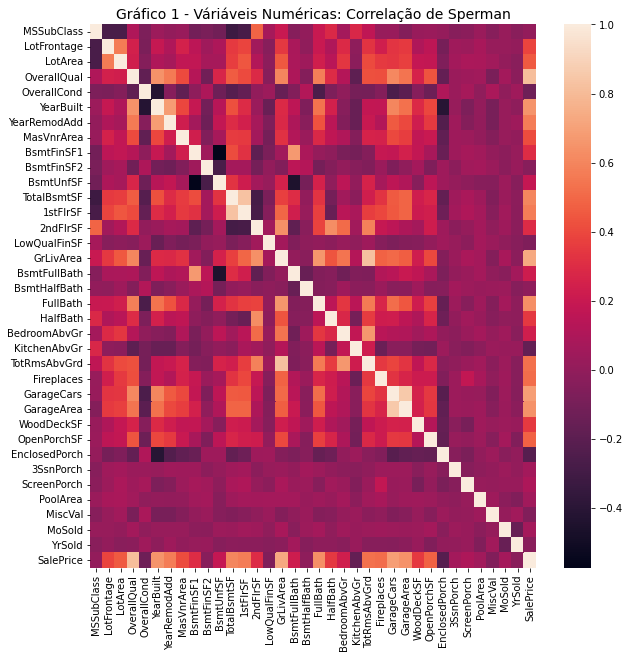

In [ ]:
plt.figure(figsize=(10,10))
ax=sns.heatmap(X_full.corr(method='spearman'))
ax.set_title("Gráfico 1 - Váriáveis Numéricas: Correlação de Sperman", fontdict = {'fontsize': 14})

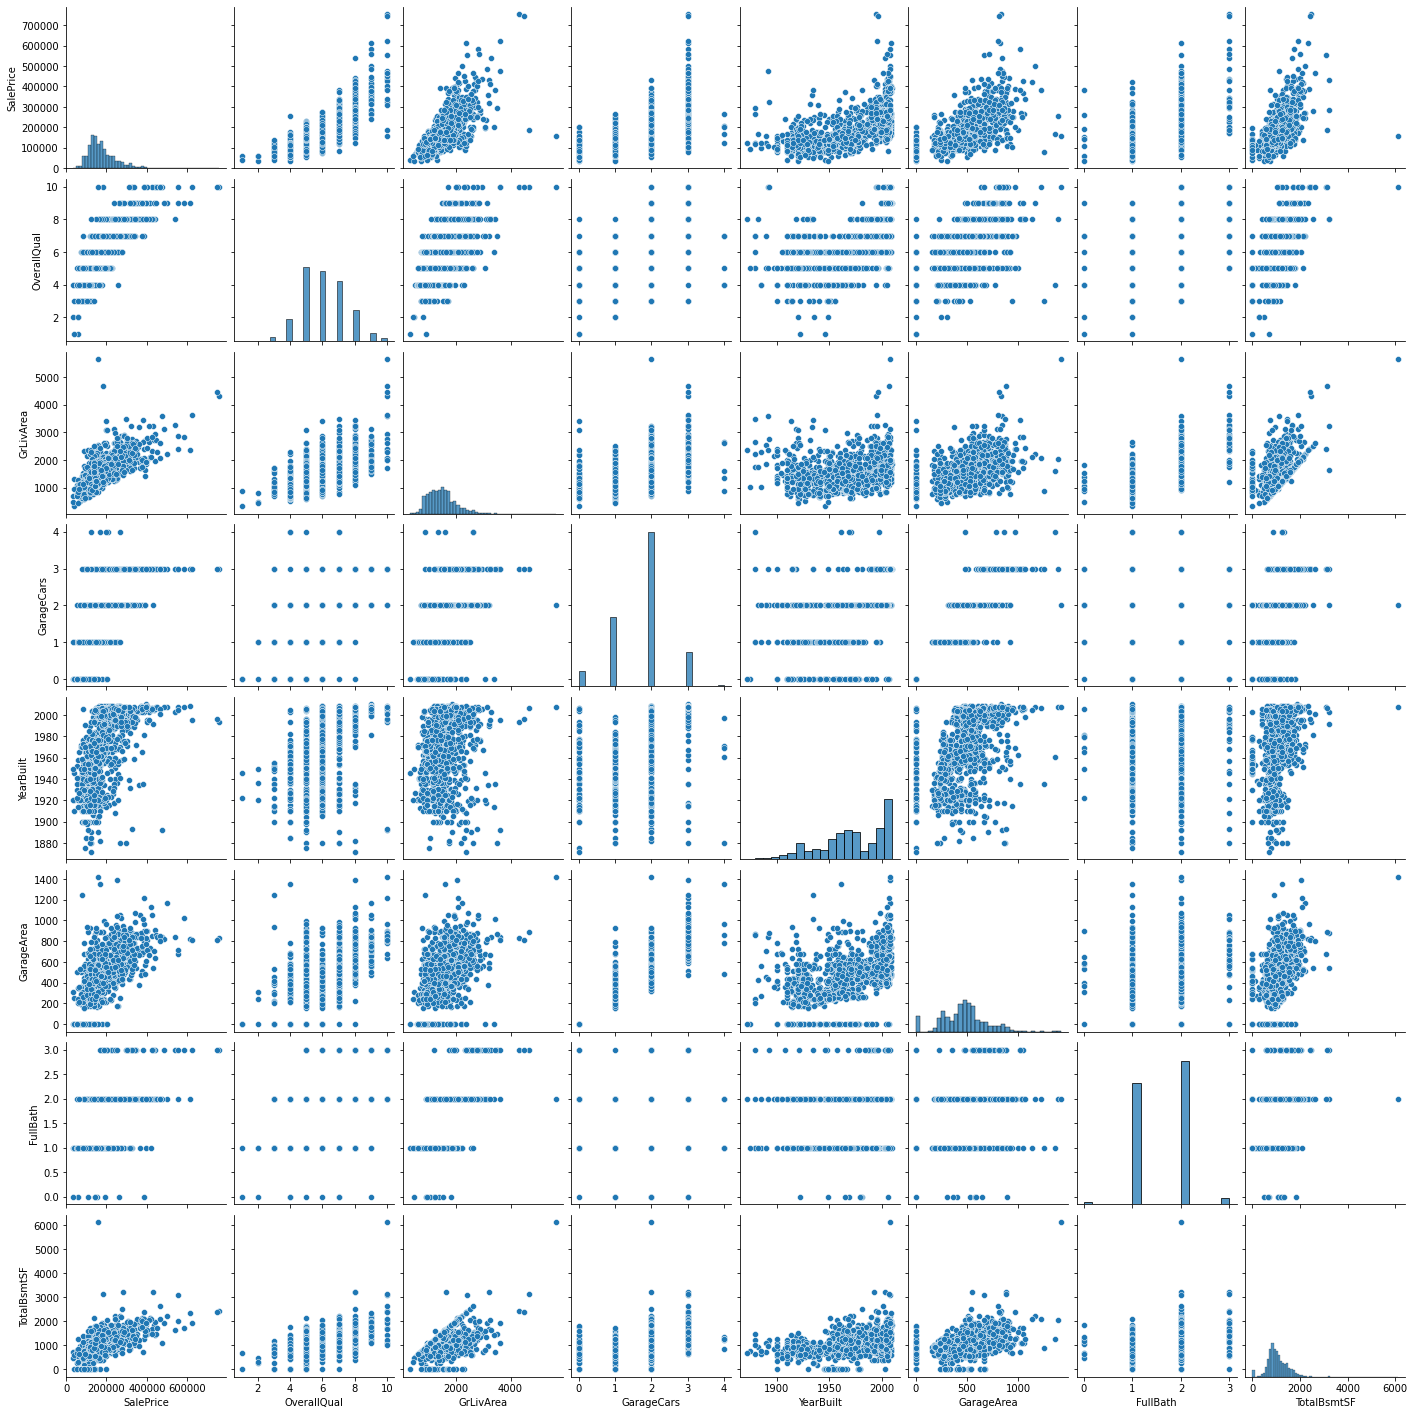

In [ ]:
sns.pairplot(X_full[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 
                    'YearBuilt', 'GarageArea', 'FullBath','TotalBsmtSF']])

In [ ]:
SalePrice_outlier = X_full.SalePrice < 350000

X_full = X_full[SalePrice_outlier]

In [ ]:
OverallQual_Q1 = X_full.OverallQual.quantile(0.25)
OverallQual_Q3 = X_full.OverallQual.quantile(0.75)
OverallQual_IQR = OverallQual_Q3-OverallQual_Q1
OverallQual_outlier =  ((X_full.OverallQual > OverallQual_Q1 - 1.5*OverallQual_IQR) & (X_full.OverallQual < OverallQual_Q3 + 1.5*OverallQual_IQR))

X_full = X_full[OverallQual_outlier]

In [ ]:
GarageCars_Q1 = X_full.GarageCars.quantile(0.25)
GarageCars_Q3 = X_full.GarageCars.quantile(0.75)
GarageCars_IQR = GarageCars_Q3-GarageCars_Q1
GarageCars_outlier_conditional =  ((X_full.GarageCars > GarageCars_Q1 - 1.5*GarageCars_IQR) & (X_full.GarageCars < GarageCars_Q3 + 1.5*GarageCars_IQR))

X_full = X_full[GarageCars_outlier_conditional]

In [ ]:
TotalBsmtSF_Q1 = X_full.TotalBsmtSF.quantile(0.25)
TotalBsmtSF_Q3 = X_full.TotalBsmtSF.quantile(0.75)
TotalBsmtSF_IQR = TotalBsmtSF_Q3-TotalBsmtSF_Q1
TotalBsmtSF_outlier =  ((X_full.TotalBsmtSF > TotalBsmtSF_Q1 - 1.5*TotalBsmtSF_IQR) & (X_full.TotalBsmtSF < TotalBsmtSF_Q3 + 1.5*TotalBsmtSF_IQR))

X_full = X_full[TotalBsmtSF_outlier]


In [ ]:
LotArea_Q1 = X_full.LotArea.quantile(0.25)
LotArea_Q3 = X_full.LotArea.quantile(0.75)
LotArea_IQR = LotArea_Q3-LotArea_Q1
LotArea_outlier =  ((X_full.LotArea > LotArea_Q1 - 1.5*LotArea_IQR) & (X_full.LotArea < LotArea_Q3 + 1.5*LotArea_IQR))

X_full = X_full[LotArea_outlier]

In [ ]:
#X_full["SqFtPerRoom"] = X_full["GrLivArea"] / (X_full["TotRmsAbvGrd"] +
                                                     #  X_full["FullBath"] +
                                                     #  X_full["HalfBath"] +
                                                      # X_full["KitchenAbvGr"])

#X_full['Total_Home_Quality'] = X_full['OverallQual'] + X_full['OverallCond']

##X_full['Total_Bathrooms'] = (X_full['FullBath'] + (0.5 * X_full['HalfBath']) +
                             #  X_full['BsmtFullBath'] + (0.5 * X_full['BsmtHalfBath']))

#X_full["HighQualSF"] = X_full["1stFlrSF"] + X_full["2ndFlrSF"]

In [ ]:
X_full_imp = X_full.copy()

In [ ]:
X_full_num = pd.DataFrame(X_full_imp, columns=['SalePrice','OverallQual','GrLivArea','GarageCars','YearBuilt','GarageArea',
                                           'FullBath','TotalBsmtSF', '1stFlrSF', 'YearRemodAdd', 'TotRmsAbvGrd', 'Fireplaces',
                                           'OpenPorchSF','LotArea', 'MasVnrArea', 'LotFrontage', 'WoodDeckSF', 'HalfBath', 'BsmtFinSF1','2ndFlrSF', 'BedroomAbvGr',
                                  'BsmtFullBath', 'BsmtUnfSF', 'ScreenPorch', '3SsnPorch','PoolArea', 'MSSubClass', 'BsmtHalfBath','YrSold', 'MoSold',
                                           'BsmtFinSF2', 'MiscVal','LowQualFinSF', 'OverallCond', 'KitchenAbvGr', 'EnclosedPorch'])


In [ ]:
#X1 = X_full_num.drop(['SalePrice'], axis=1)
#feature_names = X_full_num.columns.values
#y1 = X_full_num.SalePrice

In [ ]:
#model = RandomForestClassifier(n_estimators=100)
#model.fit(X1 , y1)


In [ ]:
#print(model.feature_importances_)

In [ ]:
#feature_importances = pd.DataFrame(model.feature_importances_, index = X1.columns, columns=['importance']).sort_values('importance', ascending=False)

In [ ]:
#feature_importances

In [ ]:
#plt.figure(figsize=(10,16))
#feature_importances.plot(kind='bar')

In [ ]:
X_full1 = X_full.copy()

In [ ]:
X_test1 = X_test.copy()

In [ ]:
#X_full1.drop(columns=['GarageCars','BsmtFullBath','HalfBath','ScreenPorch','FullBath','MiscVal','BsmtHalfBath','3SsnPorch','KitchenAbvGr',
                      # 'LowQualFinSF','PoolArea'])
#X_test1.drop(columns=['GarageCars','BsmtFullBath','HalfBath','ScreenPorch','FullBath','MiscVal','BsmtHalfBath','3SsnPorch','KitchenAbvGr',
                     #  'LowQualFinSF','PoolArea'])

In [ ]:
X = X_full1.drop(['SalePrice'], axis=1)
feature_names = X_full1.columns.values
y = X_full1.SalePrice

In [ ]:

col_ordinal = ['PoolQC','KitchenQual', 'FireplaceQu', 'HeatingQC','BsmtCond','BsmtQual','ExterQual', 'ExterCond', 'GarageQual', 'GarageCond']

col_nominal = list(set(X.select_dtypes(include='object').columns.values) - set(col_ordinal))

col_numerica = X.select_dtypes(exclude='object').columns.values

***RandomForestRegressor***

In [ ]:
RandomForestRegressor
numerical_transformer = SimpleImputer(strategy='median')

nominal_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

ordinal_transformer = Pipeline(steps=[
        ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=27))])      
                   
preprocessor = ColumnTransformer(
                 transformers=[
                  ('num', numerical_transformer, col_numerica),
                  ('cat_num', nominal_transformer, col_nominal),
                  ('ord_nom', ordinal_transformer, col_ordinal)

    ])
pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('minmaxscaler', MaxAbsScaler()), # normalização dos dados
        ('stdscaler',  StandardScaler()),
        ('regressor', RandomForestRegressor(n_estimators=100, criterion='absolute_error', min_samples_split=25, min_samples_leaf=25, max_depth=7))
    ])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=3)

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  array(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'Fu...
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=27))]),
                                                  ['PoolQC', 'KitchenQual',
                                                   'FireplaceQu', 'HeatingQC',
                                                   'BsmtCond', 'BsmtQual',
                            

In [ ]:
val_predictions = pipe.predict(X_val)


In [ ]:
len(val_predictions)

255

In [ ]:
def eval(X_train, y_train):
  y_pred = pipe.predict(X_val)

  # R2: 1 indicaria uma predição perfeita
  print('R2: %.2f' % r2_score(y_val, y_pred))

  # Raiz do Erro médio quadrático
  print("RMSE: %.2f"
        % mean_squared_error(y_val, y_pred, squared=False))
  
  # Erro médio absoluto
  print("MAE: %.2f"
        % mean_absolute_error(y_val, y_pred))

  # Erro médio percentual
  print("MAPE: %.2f"
        % mean_absolute_percentage_error(y_val, y_pred))

In [ ]:
eval(X_train, y_train)

R2: 0.76
RMSE: 29427.92
MAE: 21613.56
MAPE: 0.15


In [ ]:
from sklearn.model_selection import KFold
scores_MAPE = -1 * cross_val_score(pipe, X, y, cv=KFold(n_splits = 10), scoring='neg_mean_absolute_percentage_error')

In [ ]:
scores_MAE = -1 * cross_val_score(pipe, X, y, cv=KFold(n_splits = 10), scoring='neg_mean_absolute_error')

In [ ]:
rfr_mean = [0.13253377, 0.10130697, 0.1263477 , 0.12040222, 0.12113196,
       0.0947331 , 0.11198452, 0.1110107 , 0.10149019, 0.13165064]




In [ ]:
scores_MAPE

array([0.13253377, 0.10130697, 0.1263477 , 0.12040222, 0.12113196,
       0.0947331 , 0.11198452, 0.1110107 , 0.10149019, 0.13165064])

In [ ]:
scores_MAPE.mean()

0.11525917596839293

In [ ]:
scores_MAE.mean()

17604.57822130291

In [ ]:
#print('MSE: ',mean_squared_error(y_val, val_predictions, squared=False))
#print('MAE: ',mean_absolute_error(y_val, val_predictions))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


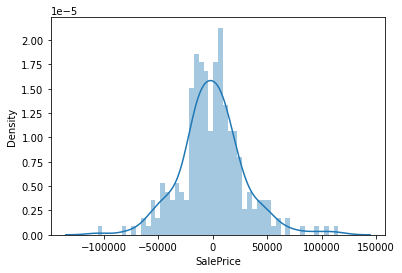

In [ ]:
y_pred = pipe.predict(X_val)
sns.distplot((y_val-y_pred),bins=50);

***DecisionTreeRegressor***

In [ ]:
# DecisionTree
numerical_transformer = SimpleImputer(strategy='median')

nominal_transformer = Pipeline(steps=[
       ('onehot', OneHotEncoder(handle_unknown='ignore'))])

ordinal_transformer = Pipeline(steps=[
       ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=27))])      
                   
preprocessor = ColumnTransformer(
               transformers=[
                 ('num', numerical_transformer, col_numerica),
                 ('cat_num', nominal_transformer, col_nominal),
                 ('ord_nom', ordinal_transformer, col_ordinal)

  ])
pipe2 = Pipeline(steps=[
       ('preprocessor', preprocessor),
       ('minmaxscaler', MaxAbsScaler()), # normalização dos dados
       ('stdscaler',  StandardScaler()),
       ('regressor', DecisionTreeRegressor( criterion='absolute_error',max_depth=9, min_samples_split=10, min_samples_leaf= 20))
        ])

In [ ]:
X_train2, X_val2, y_train2, y_val2 = train_test_split(X, y, train_size=0.8, random_state=3)

In [ ]:
pipe2.fit(X_train2, y_train2)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  array(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'Fu...
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=27))]),
                                                  ['PoolQC', 'KitchenQual',
                                                   'FireplaceQu', 'HeatingQC',
                                                   'BsmtCond', 'BsmtQual',
                            

In [ ]:
val_predictions2 = pipe2.predict(X_val2)

In [ ]:
def eval(X_train, y_train):
  y_pred2 = pipe2.predict(X_val2)

  # R2: 1 indicaria uma predição perfeita
  print('R2: %.2f' % r2_score(y_val2, y_pred2))

  # Raiz do Erro médio quadrático
  print("RMSE: %.2f"
        % mean_squared_error(y_val2, y_pred2, squared=False))
  
  # Erro médio absoluto
  print("MAE: %.2f"
        % mean_absolute_error(y_val2, y_pred2))

  # Erro médio percentual
  print("MAPE: %.2f"
        % mean_absolute_percentage_error(y_val2, y_pred2))

In [ ]:
eval(X_train2, y_train2)

R2: 0.71
RMSE: 32722.63
MAE: 23653.22
MAPE: 0.15


In [ ]:
scores_MAPE2 = -1 * cross_val_score(pipe2, X, y, cv=KFold(n_splits = 10), scoring='neg_mean_absolute_percentage_error')

In [ ]:
scores_MAPE2

array([0.14646487, 0.11936784, 0.13087673, 0.1409214 , 0.13900729,
       0.11242207, 0.13550878, 0.11728338, 0.11886683, 0.13892212])

In [ ]:
scores_MAE2 = -1 * cross_val_score(pipe2, X, y, cv=KFold(n_splits = 10), scoring='neg_mean_absolute_error')

In [ ]:
scores_MAE2.mean()

20086.372788508856

In [ ]:
scores_MAPE2.mean()

0.1299641316666275

In [ ]:
dct_mean = [0.14646487, 0.11936784, 0.13087673, 0.1409214 , 0.13900729,
       0.11242207, 0.13550878, 0.11728338, 0.11886683, 0.13892212]

#dct_std = [0.0016594075875010646,



In [ ]:
#scores2.std()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


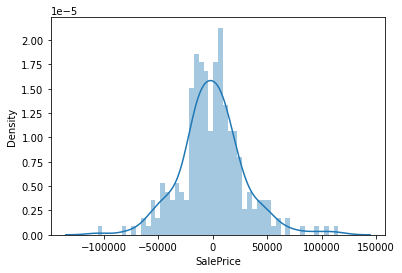

In [ ]:
y_pred2 = pipe.predict(X_val2)
sns.distplot((y_val2-y_pred2),bins=50);

**Comparação dos MODELOS**

In [ ]:
random = rfr_mean

tree = dct_mean

In [ ]:
erros_med_abs = pd.DataFrame({'RandomForestRegressor': random,
            'DecisionTreeRegressor': tree,
            })

In [ ]:
erros_med_abs

,RandomForestRegressor,DecisionTreeRegressor
0,0.132534,0.146465
1,0.101307,0.119368
2,0.126348,0.130877
3,0.120402,0.140921
4,0.121132,0.139007
5,0.094733,0.112422
6,0.111985,0.135509
7,0.111011,0.117283
8,0.101490,0.118867
9,0.131651,0.138922


In [ ]:
resultados = pd.DataFrame({'y_val': y_val,
            'val_pred': val_predictions,
             'abs_err': abs(val_predictions-y_val)})

In [ ]:
g = sns.lineplot(resultados, col="val_pred", margin_titles=True,
            
                  )


ValueError: ignored

Text(0.5, 1.0, 'Gráfico 3 - MAPE')

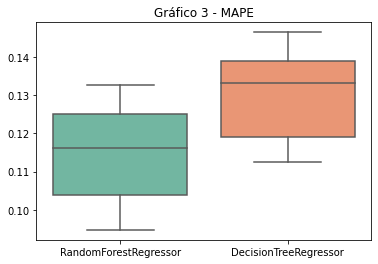

In [ ]:

ax = sns.boxplot(data=erros_med_abs, orient="v", palette="Set2")
ax.set_title("Gráfico 3 - MAPE")

Text(0.5, 1.0, 'MAPE - Random Forest Regressor')

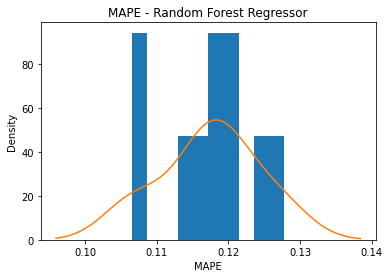

In [ ]:
ax = erros_med_abs['RandomForestRegressor'].plot.hist(density=True)
erros_med_abs['RandomForestRegressor'].plot.density(ax=ax)
ax.set_xlabel('MAPE')
ax.set_title("MAPE - Random Forest Regressor")

Text(0.5, 1.0, 'MAPE - Decison Tree Regressor')

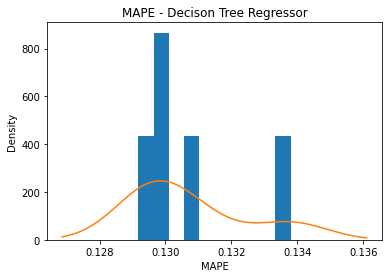

In [ ]:
ax = erros_med_abs['DecisionTreeRegressor'].plot.hist(density=True)
erros_med_abs['DecisionTreeRegressor'].plot.density(ax=ax)
ax.set_xlabel('MAPE')
ax.set_title("MAPE - Decison Tree Regressor")

In [ ]:
#espaco_de_parametros = dict(
#    regressor__max_depth= [2,3,5,7,9,11],
#    regressor__min_samples_split= [10,15,20,25,30,32],
#    regressor__min_samples_leaf= [10,15,20,25,30,32])

#busca_exaustiva = GridSearchCV(pipe2,
#                              espaco_de_parametros,
#                              cv = KFold(n_splits=5))

In [ ]:
#espaco_de_parametros = dict(
#    regressor__max_depth= [2,3,5,7],
#    regressor__min_samples_split= [25,30,32,40],
#    regressor__min_samples_leaf= [25,30,32,40])

#busca_exaustiva = GridSearchCV(pipe,
#                              espaco_de_parametros,
#                              cv = KFold(n_splits=5))

In [ ]:
#busca_exaustiva.fit(X, y)

In [ ]:
#resultados = pd.DataFrame(busca_exaustiva.cv_results_)
#resultados.head()


In [ ]:
#busca_exaustiva.best_estimator_

In [ ]:
#busca_exaustiva.best_params_